# Homework 9: Linear Regression

Following is weather data measured by our weather station here at Snow College. We are going to use this data to perform a linear regression. The goal will be to predict the relative humidity based on the other data.

* [Snow College Weather Data](https://raw.githubusercontent.com/drolsonmi/math3280/refs/heads/master/Notes/data/Snow%20Weather_Daily.csv)

Documentation for weather data:
* 'AirTF_Avg' = Average air temperature in Fahrenheit
* 'AirTF_Max' = Maximum air temperature in Fahrenheit
* 'AirTF_Min' = Maximum air temperature in Fahrenheit
* 'RH_Avg' = Average daily relative humidity
* 'WindGust' = Maximum wind gust (maximum singular wind speed)
* 'AveWindSp' = Average wind speed
* 'WindDir' = Wind direction
* 'BP_inHg_Avg' = Barometric Pressure in inches of mercury (inHg)
* 'Rain_Tot' = Total daily rainfall in inches
* 'TdC_Min' = Minimum dew point temperature in Celsius
* 'TdC_Max' = Maximum dew point temperature in Celsius

All other columns will not be needed for these assignments. So, load the data and drop all other columns. Also note that the first three rows are header rows. Keep the first as column headers, but remove the next two rows.

1. Is this dataset overdetermined or underdetermined?
2. Based on your answer from question 1, which of the following would you expect?
3. Perform a linear regression just between Temperature (`AirTF_Avg`) and Relative Humidity (`RH_Avg`). Use the SVDs method to complete the linear regression. What is the value of the bias?
4. What is the value of the parameter?
5. Use the bias and parameter to predict the relative humidity if the temperature is $T$.
6. The correlation coefficient is found using the equation below. Find this correlation between temperature and humidity.
    $$r = \frac{1}{n-1}\sum \frac{x-\bar{x}}{s_x}\frac{y-\bar{y}}{s_y}$$


Notice that the regression is not perfect. That is because other variables come into play. We will now create a linear regression to predict the relative humidity based on all other variables.

7. Create a linear regression to predict the relative humidity based on all other variables using the SVD method. Copy the code here.
8. Running this on the data, identify the bias and the parameters.
9. What is the parameter associated with Barometric Pressure?
10. Predict the Relative Humidity with the following variables:
    * Temperature = $T$
    * Maximum Temperature = $X$
    * Minimum Temperature = $N$
    * Peak Wind Gust = $G$
    * Average Wind Speed = $W$
    * Wind Dir = 180
    * Barometric Pressure = $P$
    * Rain Total = 0
    * Maximum Dew Point Temperature = $D$
    * Minimum Dew Point Temperature = $E$

-----

In [ ]:
import numpy as numpy
import pandas as pd

wx = pd.read_csv("./data/Snow Weather_Daily.csv", header=1)

wx.drop(['TIMESTAMP', 'RECORD', 'AirTF_TMx',
       'AirTF_TMn', 'RH_Max', 'RH_TMx', 'RH_Min',
       'RH_TMn', 'WS_mph_TMx',
       'WindDir_SD', 'BP_inHg_Max', 'BP_inHg_TMx',
       'BP_inHg_Min', 'BP_inHg_TMn', 'SlrkW_Max', 'HeatedPrecip_Tot',
       'WC_C_Min', 'HI_C_Max'], inplace=True, axis=1)

wx = wx.tail(len(wx)-2)

-----

In [29]:
import numpy as np
import pandas as pd

wx = pd.read_csv("https://raw.githubusercontent.com/drolsonmi/math3280/refs/heads/master/Notes/data/Snow%20Weather_Daily.csv", header=1)
wx.drop([0,1], inplace=True, axis=0)
wx.drop(['TIMESTAMP', 'RECORD', 'AirTF_TMx',
       'AirTF_TMn', 'RH_Max', 'RH_TMx', 'RH_Min',
       'RH_TMn', 'WS_mph_TMx',
       'WindDir_SD', 'BP_inHg_Max', 'BP_inHg_TMx',
       'BP_inHg_Min', 'BP_inHg_TMn', 'SlrkW_Max', 'HeatedPrecip_Tot',
       'WC_C_Min', 'HI_C_Max'], inplace=True, axis=1)

wx = wx.apply(pd.to_numeric, errors='coerce')
wx.head()

,AirTF_Avg,AirTF_Max,AirTF_Min,RH_Avg,WindGust,AveWindSp,WindDir,BP_inHg_Avg,Rain_Tot,TdC_Min,TdC_Max
2,61.76,72.20,50.01,54.66,29.81,5.476863,54.21596,30.08,0.13,41.22,51.29
3,57.03,73.42,45.86,65.27,22.14,2.771693,86.26220,30.04,0.01,43.28,54.33
4,57.60,73.42,41.83,58.28,23.89,2.735624,158.06330,30.01,0.00,38.68,51.87
5,58.63,75.01,44.28,56.97,18.63,2.876131,133.46290,30.06,0.00,40.65,53.12
6,61.61,78.68,41.47,51.57,18.19,2.283650,354.96510,30.10,0.00,38.23,52.72


-----

In [1]:
# 1. Overdetermined

In [2]:
# 2. There are likely no solutions

In [34]:
# 3. Lin Reg between T and RH using SVDs
# X = wx['AirTF_Avg'].to_numpy().reshape(-1, 1)
# X = np.insert(X, 0, 1, axis=1)  # add intercept term
X = np.array([[1, t] for t in wx['AirTF_Avg'].to_numpy()])
y = wx['RH_Avg'].to_numpy()

U, S, VT = np.linalg.svd(X, full_matrices=False)
S_inv = np.linalg.inv(np.diag(S))
X_pinv = VT.T @ S_inv @ U.T

Theta = X_pinv @ y
print("Theta = ", Theta)

Theta =  [45.09677536  0.14501   ]


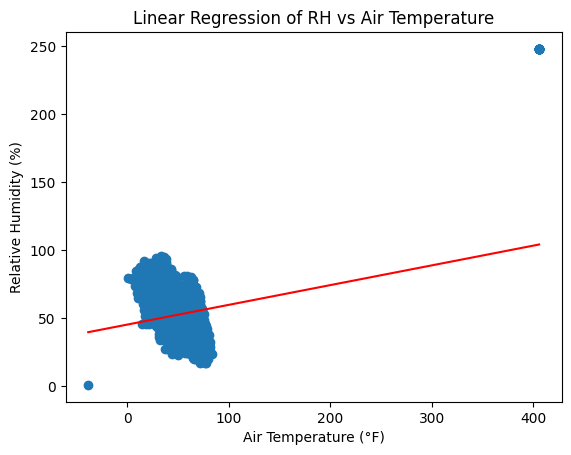

In [36]:
import matplotlib.pyplot as plt

plt.scatter(wx['AirTF_Avg'], wx['RH_Avg'])
x = np.linspace(wx['AirTF_Avg'].min(), wx['AirTF_Avg'].max(), 100)
y_pred = Theta[0] + Theta[1] * x
plt.plot(x, y_pred, color='red')
plt.xlabel('Air Temperature (°F)')
plt.ylabel('Relative Humidity (%)')
plt.title('Linear Regression of RH vs Air Temperature')
plt.show()